# Processing of the data collected for an SHS project of EPFL


In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

### Extration of data:

Please select the rigt dataset

In [123]:
file_code = 1

if file_code ==1:
    resultats = pd.read_csv('Resultats.csv' , engine='python')
elif file_code == 2:
    resultats = pd.read_csv('resultat_un_seul_passage.csv' , engine='python')
elif file_code == 3:
    resultats = pd.read_csv('resultat_un_seul_passage_final.csv' , engine='python')
    resultats.columns = ['Lieux (A=salle, B=bureau)', 'Participant', 'Sexe', 'Age', 'Groupe',
        'Nbre essais', 'CRI APP', 'TEST', 'Delta']
else:
    print('Please select a valid file_code!')
resultats.head(20)

Lieux (A=salle, B=bureau) Participant Sexe   Age  Groupe  Nbre essais  \
0                         AA        G1/1    F  19.0       1            1   
1                         AA        G1/2    F  26.0       1            1   
2                         AA        G1/3    F  20.0       1            2   
3                         AA        G1/4    H  20.0       1            1   
4                         AA        G1/5    H  19.0       1            2   
5                         AA        G1/6    H  21.0       1            2   
6                         AB        G2/1    H  25.0       2            2   
7                         AB        G2/2    H  20.0       2            2   
8                         AB        G2/3    F  27.0       2            1   
9                         AB        G2/4    H  22.0       2            2   
10                        AB        G2/5    F  21.0       2            2   
11                        AB        G2/6    F  18.0       2            1   
12                        BB        G3/1    F  20.0       3            2   
13                        BB        G3/2    F  19.0       3            2   
14                        BB        G3/3    H  20.0       3            1   
15                        BB        G3/4    H  20.0       3            2   
16                        BB        G3/5    H  19.0       3            1   
17                        BB        G3/6    F  21.0       3            1   
18                        BA        G4/1    F  19.0       4            1   
19                        BA        G4/2    F  20.0       4            1   

    Essai 1  Essai 2  CRI APP  TEST  Delta  
0        17      NaN       17    15     -2  
1        15      NaN       15    13     -2  
2        14     16.0       16    14     -2  
3        16      NaN       16    16      0  
4        12     13.0       13    14      1  
5        14     16.0       16    17      1  
6        12     18.0       18    17     -1  
7        13     16.0       16    17      1  
8        16      NaN       16    14     -2  
9        10     13.0       13    12     -1  
10       12     14.0       14    12     -2  
11       15      NaN       15    16      1  
12       11     18.0       18    12     -6  
13       13     17.0       17    16     -1  
14       14      NaN       14    13     -1  
15        9     15.0       15    11     -4  
16       15      NaN       15    11     -4  
17       15      NaN       15    16      1  
18       15      NaN       15    11     -4  
19       15      NaN       15    11     -4

### Parameters:

In [124]:
salles = ['AA','AB','BA','BB']

### some functions that we will use later in the analysis:

In [125]:
def mean(filter_col,col='TEST'):
    return pd.DataFrame(resultats.groupby(by=filter_col).mean()[col])

def std(filter_col,col='TEST'):
    return pd.DataFrame(resultats.groupby(by=filter_col).std()[col])

def test_mean(col):
    count = resultats.groupby(by=col).count()
    sum_ = resultats.groupby(by=col).sum()
    return sum_/count

def test_mean_double(col1,col2):
    count = resultats.groupby(by=[col1,col2]).count()
    sum_ = resultats.groupby(by=[col1,col2]).sum()
    return sum_/count

Here is the mean per context

In [126]:
col='Lieux (A=salle, B=bureau)'
test_mean(col)
#test_mean_double(col1='Lieux (A=salle, B=bureau)',col2='Sexe')
mean(['Lieux (A=salle, B=bureau)','Nbre essais'])

TEST
Lieux (A=salle, B=bureau) Nbre essais           
AA                        1            14.666667
                          2            15.000000
AB                        1            15.000000
                          2            14.500000
BA                        1            12.250000
                          2            15.000000
BB                        1            13.333333
                          2            13.000000

### compute the retention percentage of each context

In [127]:
def compute_precentage_mean(salle,apprentissage_col = 'CRI APP', test_col = 'TEST'):
    """Percentage computed tested divided by learned"""
    test = resultats[test_col][resultats['Lieux (A=salle, B=bureau)']==salle]
    appr = resultats[apprentissage_col][resultats['Lieux (A=salle, B=bureau)']==salle]
    percentage = test/appr*100
    return percentage.mean(), percentage.std()

mean_percentage = []
std_percentage = []
for x in salles:
    tmp, std_ = compute_precentage_mean(x)
    mean_percentage.append(tmp)
    std_percentage.append(std_)
    print('mean pourcentage d"oubli in salle:',x,'    ',tmp,' % and std:  ',std_)
print('Same: ',(mean_percentage[0]+mean_percentage[3])/2, '   With mean std:  ', (std_percentage[0]+std_percentage[3])/2)
print('Different: ',(mean_percentage[1]+mean_percentage[2])/2, '   With mean std:  ', (std_percentage[1]+std_percentage[2])/2)

mean pourcentage d"oubli in salle: AA      96.0573780794369  % and std:   9.771433612916335
mean pourcentage d"oubli in salle: AB      95.48051485551485  % and std:   9.069949243895191
mean pourcentage d"oubli in salle: BA      83.08415032679738  % and std:   11.72677111858226
mean pourcentage d"oubli in salle: BB      84.49579831932773  % and std:   15.627659092364706
Same:  90.27658819938232    With mean std:   12.699546352640521
Different:  89.28233259115612    With mean std:   10.398360181238726


In [130]:
aa = np.median(resultats['Delta'][resultats['Lieux (A=salle, B=bureau)']=='AA'])
ab = np.median(resultats['Delta'][resultats['Lieux (A=salle, B=bureau)']=='AB'])
ba = np.median(resultats['Delta'][resultats['Lieux (A=salle, B=bureau)']=='BA'])
bb = np.median(resultats['Delta'][resultats['Lieux (A=salle, B=bureau)']=='BB'])
print(aa,ab,ba,bb)

-1.0 -1.0 -2.5 -2.5


### Scatter plots of the data by salle and sexe & age to visualize the data

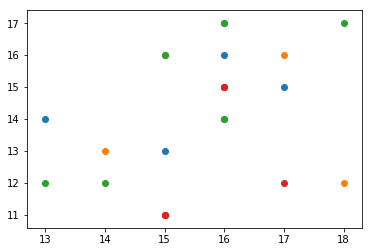

In [131]:
def scatter_plot_by_salle(col_x,col_y):
    salles = ['AA','BB','AB','BA']
    for salle in salles:
        x = resultats[col_x][resultats['Lieux (A=salle, B=bureau)']==salle]
        y = resultats[col_y][(resultats['Lieux (A=salle, B=bureau)']==salle)]
        p = plt.scatter(x, y)
    return p
  
scatter_plot_by_salle(col_x='CRI APP',col_y='TEST')

By sexe:  Delta  as a function of  Age


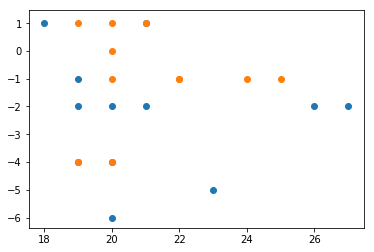

In [132]:
def scatter_plot_by_sex(col_x,col_y):
    sexes = ['F','H']
    print('By sexe: ', str(col_y),' as a function of ', str(col_x))
    for sex in sexes:
        x = resultats[col_x][resultats['Sexe']==sex]
        y = resultats[col_y][(resultats['Sexe']==sex)]
        p = plt.scatter(x, y)
    return p
#scatter_plot_by_sex(col_x='CRI APP',col_y='TEST')
scatter_plot_by_sex(col_x='Age',col_y='Delta')

In [133]:
def mean(filter_col,col='TEST'):
    return pd.DataFrame(resultats.groupby(by=filter_col).mean()[col])
df = mean(filter_col=['Lieux (A=salle, B=bureau)','Sexe'],col='Delta')
#df.loc[(df.index.get_level_values('A') > 1.7) & (df.index.get_level_values('B') < 666)]
women_means = df.loc[(df.index.get_level_values('Sexe') == 'F')].Delta
men_means = df.loc[(df.index.get_level_values('Sexe') == 'H')].Delta


In [134]:
def std(filter_col,col='TEST'):
    return pd.DataFrame(resultats.groupby(by=filter_col).std()[col])
df = std(filter_col=['Lieux (A=salle, B=bureau)','Sexe'],col='Delta')
women_std = df.loc[(df.index.get_level_values('Sexe') == 'F')].Delta
men_std = df.loc[(df.index.get_level_values('Sexe') == 'H')].Delta

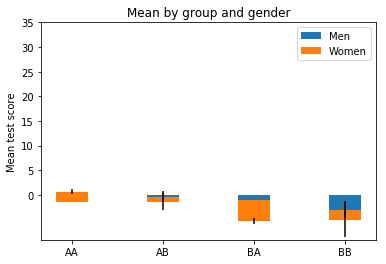

In [135]:
salles = ['AA','AB','BA','BB']
N = len(salles)
menMeans = list(men_means)
womenMeans = list(women_means)
menStd = list(men_std)
womenStd = list(women_std)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Mean test score')
plt.title('Mean by group and gender')
plt.xticks(ind, salles)
plt.yticks(np.arange(0, 40, 5))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

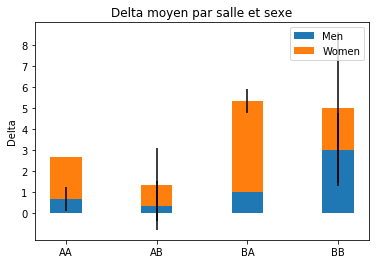

In [136]:
df = mean(filter_col=['Lieux (A=salle, B=bureau)','Sexe'],col='Delta')
#df.loc[(df.index.get_level_values('A') > 1.7) & (df.index.get_level_values('B') < 666)]
women_means = df.loc[(df.index.get_level_values('Sexe') == 'F')].Delta
men_means = df.loc[(df.index.get_level_values('Sexe') == 'H')].Delta

df = std(filter_col=['Lieux (A=salle, B=bureau)','Sexe'],col='Delta')
women_std = df.loc[(df.index.get_level_values('Sexe') == 'F')].Delta
men_std = df.loc[(df.index.get_level_values('Sexe') == 'H')].Delta

salles = ['AA','AB','BA','BB']
N = len(salles)
menMeans = list(men_means.abs())
womenMeans = list(women_means.abs())
menStd = list(men_std)
womenStd = list(women_std)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Delta')
plt.title('Delta moyen par salle et sexe')
plt.xticks(ind, salles)
plt.yticks(np.arange(0, 9, 1))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.savefig('Delta moyen par sex.png')
plt.show()

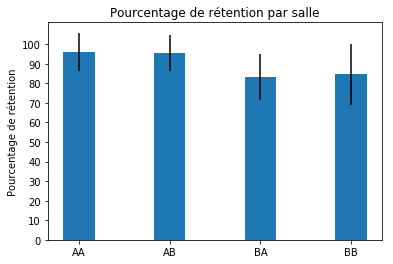

In [137]:
salles = ['AA','AB','BA','BB']
N = len(salles)
pourcentages = mean_percentage
menStd = std_percentage
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, pourcentages, width, yerr=menStd)
#p2 = plt.bar(ind, womenMeans, width,
#             bottom=menMeans, yerr=womenStd)

plt.ylabel('Pourcentage de rétention')
plt.title('Pourcentage de rétention par salle')
plt.xticks(ind, salles)
plt.yticks(np.arange(0, 110, 10))
#plt.legend('Men')

plt.savefig('Pourcentage de rétention par salle.png')
plt.show()

### Delta moyen par sexe et salle:

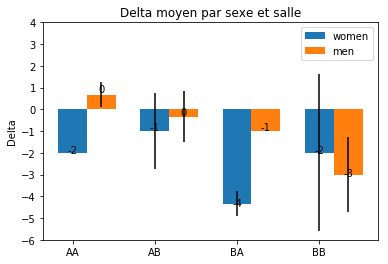

In [140]:
import numpy as np
import matplotlib.pyplot as plt

df = mean(filter_col=['Lieux (A=salle, B=bureau)','Sexe'],col='Delta')
#df.loc[(df.index.get_level_values('A') > 1.7) & (df.index.get_level_values('B') < 666)]
women_means = df.loc[(df.index.get_level_values('Sexe') == 'F')].Delta
men_means = df.loc[(df.index.get_level_values('Sexe') == 'H')].Delta

df = std(filter_col=['Lieux (A=salle, B=bureau)','Sexe'],col='Delta')
women_std = df.loc[(df.index.get_level_values('Sexe') == 'F')].Delta
men_std = df.loc[(df.index.get_level_values('Sexe') == 'H')].Delta


salles = ['AA','AB','BA','BB']
N = len(salles)
ind = np.arange(N)  
menMeans = list(men_means.abs())
womenMeans = list(women_means.abs())
menStd = list(men_std)
womenStd = list(women_std)

#width = 0.35       

#N = 3
#ind = np.arange(N)  # the x locations for the groups
width = 0.35      # the width of the bars

#fig = plt.figure()
#ax = fig.add_subplot(111)

rects1 = plt.bar(ind, women_means, width,yerr=womenStd)
rects2 = plt.bar(ind+width, men_means, width, yerr=menStd)

plt.title('Delta moyen par sexe et salle')
plt.ylabel('Delta')
plt.xticks(ind, salles)
plt.yticks(np.arange(-6, 5, 1))
plt.legend( (rects1[0], rects2[0]), ('women', 'men') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.savefig('Delta moyen par sexe et salle.png')
plt.show()

### Delta moyen par nombre d'essais et salle

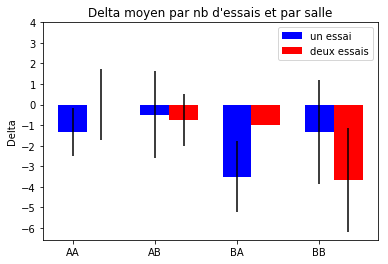

In [139]:
if file_code !=1:
    print ('You do not have different Nbre essais for this try')
else:
    import numpy as np
    import matplotlib.pyplot as plt

    df = mean(filter_col=['Lieux (A=salle, B=bureau)','Nbre essais'],col='Delta')
    df

    #df.loc[(df.index.get_level_values('A') > 1.7) & (df.index.get_level_values('B') < 666)]
    one_means = df.loc[(df.index.get_level_values('Nbre essais') == 1)].Delta

    two_means = df.loc[(df.index.get_level_values('Nbre essais') == 2)].Delta

    df = std(filter_col=['Lieux (A=salle, B=bureau)','Nbre essais'],col='Delta')
    one_std = df.loc[(df.index.get_level_values('Nbre essais') == 1)].Delta
    two_std = df.loc[(df.index.get_level_values('Nbre essais') == 2)].Delta


    salles = ['AA','AB','BA','BB']
    N = len(salles)
    ind = np.arange(N)  
    oneMeans = list(one_means)
    twoMeans = list(two_means)
    oneStd = list(one_std)
    twoStd = list(two_std)

    #width = 0.35       

    #N = 3
    #ind = np.arange(N)  # the x locations for the groups
    width = 0.35      # the width of the bars

    #fig = plt.figure()
    #ax = fig.add_subplot(111)

    rects1 = plt.bar(ind, one_means, width,yerr=oneStd, color='b')
    rects2 = plt.bar(ind+width, two_means, width, yerr=twoStd, color = 'r')

    plt.title("Delta moyen par nb d'essais et par salle")
    plt.ylabel('Delta')
    plt.xticks(ind, salles)
    plt.yticks(np.arange(-6, 5, 1))
    plt.legend( (rects1[0], rects2[0]), ('un essai', 'deux essais') )

    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            plt.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                    ha='center', va='bottom')

    #autolabel(rects1)
    #autolabel(rects2)

    plt.savefig('Delta moyen par nb d"essais.png')
    plt.show()

Scatter plot?

### Delta moyen par score à l'apprentissage

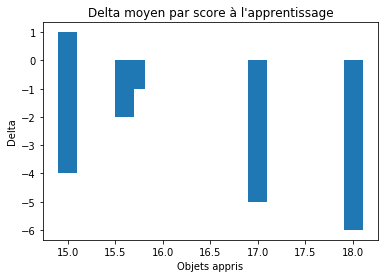

In [108]:
df_sum = resultats.groupby(by='Delta').sum()
df_count = resultats.groupby(by='Delta').count()
df = df_sum/df_count
df = df.reset_index()


x = df['CRI APP']
y = df['Delta']
plt.bar(x, y, width= 0.2)
plt.title("Delta moyen par score à l'apprentissage")
plt.ylabel('Delta')
plt.xlabel('Objets appris')

plt.savefig('Delta VS apprentissage.png')
plt.show()